In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import time
import sys
sys.path.insert(0,'../..')
import gp2
from gp2 import Runner
from keras import losses, metrics
from tensorflow.keras import optimizers

In [3]:
R = Runner(classifier='kr2unet2d' , 
           discriminator='cnn', #cnnplus
           filter_num=[8, 16, 32, 64, 128, 256],
           stack_num_down=2, 
           stack_num_up=2, 
           recur_num=2, 
           activation='ReLU', 
           output_activation='Sigmoid', 
           batch_norm=True, 
           pool=True, 
           unpool=True, 
           optimizer=None, 
           loss=None, 
           metric=None,
          )

*** GP2 R2UNet2dD ***
Working directory: /tmp/tmpbiy4i4f7GP2
Using default discriminator (CNN)


In [4]:
# load our larger toy dataset (10k images and masks)
images = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/GP2TOYEXAMPLE_LARGE/images.npy')
masks = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/GP2TOYEXAMPLE_LARGE/masks.npy')

In [5]:
images = images[:5000]
masks = masks[:5000]

In [6]:
images.shape

(5000, 512, 512, 1)

In [7]:
masks.shape

(5000, 512, 512, 1)

In [8]:
weights = {
    'A': 0.5,
    'A_train': 0.1,
    'A_val': 0.3,
    'A_test': 0.6,
    'B': 0.3,
    'B_train': 0.7,
    'B_val': 0.1,
    'B_test': 0.2,
    'Z': 0.2
}

In [ ]:
R.run(images=images, masks=masks, weights=weights, runs=5)

Weights OK!
******
Loop 0
Epoch 1/100
4/4 [==============================] - 25s 3s/step - loss: 6.3461 - dice_coef: 0.2045 - val_loss: 5.5915 - val_dice_coef: 0.2443
Epoch 2/100
4/4 [==============================] - 6s 2s/step - loss: 6.3479 - dice_coef: 0.2043 - val_loss: 5.9965 - val_dice_coef: 0.2251
Epoch 3/100
4/4 [==============================] - 6s 2s/step - loss: 6.3480 - dice_coef: 0.2045 - val_loss: 6.1274 - val_dice_coef: 0.2177
Model saved to: /tmp/tmpbiy4i4f7GP2/r2_unet_0r2_unet_model
History saved to: /tmp/tmpbiy4i4f7GP2/r2_unet_history_0.pkl
Testing the classifier...


In [ ]:
R.classifier_scores

In [ ]:
R.discriminator_scores

In [ ]:
R.plot()

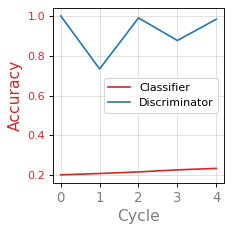

In [12]:
R.plot()

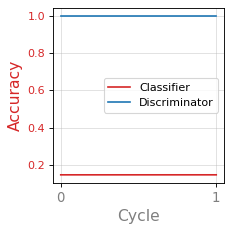

In [13]:
R.plot()

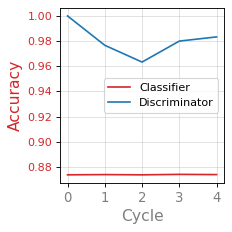

In [13]:
R.plot()